# Lab | Music Recommender Full Lab


#### Instructions 


To move forward with the project, you need to create a collection of songs with their audio features - as large as possible! 

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster.
The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [6]:
# Setting up all my stuff as a first step 

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
from pandas import json_normalize

In [11]:
# Acessing my secrets file
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [17]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))


In [20]:
# Time to get some data from a playlists
# Will start with this one - Rap UK: 37i9dQZF1DX6PKX5dyBKeq
playlist = sp.user_playlist_tracks("spotify", "37i9dQZF1DX6PKX5dyBKeq")
playlist["total"] 

65

In [22]:
# Won't need this for this particular playlist but useful to create the function for later
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [23]:
all_tracks = get_playlist_tracks("37i9dQZF1DX6PKX5dyBKeq")
len(all_tracks)

65

In [24]:
tracks2 = json_normalize(all_tracks)
tracks2

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.preview_url,track.available_markets,...,track.duration_ms,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.name,track.popularity,track.uri,track.is_local,video_thumbnail.url
0,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,139200,USZXT2454101,https://open.spotify.com/track/0lisP3XLMVyFL0p...,https://api.spotify.com/v1/tracks/0lisP3XLMVyF...,0lisP3XLMVyFL0pYfhROPK,Mobsters,54,spotify:track:0lisP3XLMVyFL0pYfhROPK,False,None
1,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/03b5dcf782af7ef7...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,124471,UKQNW2400001,https://open.spotify.com/track/13bPROSNrEszkMc...,https://api.spotify.com/v1/tracks/13bPROSNrEsz...,13bPROSNrEszkMcTtX2SHh,Joga Bonito,70,spotify:track:13bPROSNrEszkMcTtX2SHh,False,None
2,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/8f28a153860c8d8b...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,204170,GBARL2400420,https://open.spotify.com/track/1RAwKDC2VKpxLy6...,https://api.spotify.com/v1/tracks/1RAwKDC2VKpx...,1RAwKDC2VKpxLy6es0KZTJ,Cry No More (feat. Stormzy & Tay Keith),74,spotify:track:1RAwKDC2VKpxLy6es0KZTJ,False,None
3,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/23c49704e2177309...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,148189,GBARL2400393,https://open.spotify.com/track/6scm1j3DHw8v3fQ...,https://api.spotify.com/v1/tracks/6scm1j3DHw8v...,6scm1j3DHw8v3fQruA9q47,Malicious Intentions,69,spotify:track:6scm1j3DHw8v3fQruA9q47,False,None
4,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/83f5f34a3e51fbcd...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,176640,QM6MZ2408231,https://open.spotify.com/track/62KYfsqveMHjmwZ...,https://api.spotify.com/v1/tracks/62KYfsqveMHj...,62KYfsqveMHjmwZbU69OH7,Famous Girl,62,spotify:track:62KYfsqveMHjmwZbU69OH7,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/c3aa42ba280fc6fb...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,158896,QM6MZ2443741,https://open.spotify.com/track/6umH86JNGXD7Ape...,https://api.spotify.com/v1/tracks/6umH86JNGXD7...,6umH86JNGXD7Ape63zIMZl,HDC 2.0,46,spotify:track:6umH86JNGXD7Ape63zIMZl,False,None
61,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/84a5cf43ff753a8b...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",...,184800,QZES92409710,https://open.spotify.com/track/6jVz9SDuUdZJy2r...,https://api.spotify.com/v1/tracks/6jVz9SDuUdZJ...,6jVz9SDuUdZJy2rfflM7uK,rap101,38,spotify:track:6jVz9SDuUdZJy2rfflM7uK,False,None
62,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/7bbf0482c573cf03...,[],...,170666,GBLFP2499691,https://open.spotify.com/track/60imHRZdX6h0aDO...,https://api.spotify.com/v1/tracks/60imHRZdX6h0...,60imHRZdX6h0aDOZKDUzCq,Real Rap 1,35,spotify:track:60imHRZdX6h0aDOZKDUzCq,False,None
63,2024-05-03T03:02:35Z,False,None,https://open.spotify.com/user/,https://api.spotify.com/v1/users/,,user,spotify:user:,https://p.scdn.co/mp3-preview/e2ebb699ae24670f...,"[AR, AU, AT, BE, BO, BR, BG, CA, C

In [25]:
# Testing out creating the dataframe

artists_df2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify','song_id', 'song_name', 'popularity' ])
for i in tracks2.index:
    artists_for_song = json_normalize(tracks2.iloc[i]['track.artists'])
    artists_for_song['song_id']    = tracks2.iloc[i]['track.id']         # we want to keep song_id, it is the sae for all artists
    artists_for_song['song_name']  = tracks2.iloc[i]['track.name']       # we want to keep song_name, it is the sae for all artists
    artists_for_song['popularity'] = tracks2.iloc[i]['track.popularity'] # same for popularity   
    artists_df2 = pd.concat([artists_df2, artists_for_song], axis=0)

In [26]:
df_final2 = artists_df2[['song_name', 'name', 'song_id', 'popularity']]
df_final2

,song_name,name,song_id,popularity
0,Mobsters,K-Trap,0lisP3XLMVyFL0pYfhROPK,54
1,Mobsters,Blade Brown,0lisP3XLMVyFL0pYfhROPK,54
0,Joga Bonito,AJ Tracey,13bPROSNrEszkMcTtX2SHh,70
0,Cry No More (feat. Stormzy & Tay Keith),Headie One,1RAwKDC2VKpxLy6es0KZTJ,74
1,Cry No More (feat. Stormzy & Tay Keith),Stormzy,1RAwKDC2VKpxLy6es0KZTJ,74
...,...,...,...,...
0,rap101,Moko,6jVz9SDuUdZJy2rfflM7uK,38
0,Real Rap 1,Dimzy,60imHRZdX6h0aDOZKDUzCq,35
1,Real Rap 1,67,60imHRZdX6h0aDOZKDUzCq,35
0,Will You Ever?,Cristale,6vcAHwVgJ3oNE85Grs1QIN,39


In [27]:
# and it works - just need to reset the index before adding more songs
# df_final2.reset_index()

,index,song_name,name,song_id,popularity
0,0,Mobsters,K-Trap,0lisP3XLMVyFL0pYfhROPK,54
1,1,Mobsters,Blade Brown,0lisP3XLMVyFL0pYfhROPK,54
2,0,Joga Bonito,AJ Tracey,13bPROSNrEszkMcTtX2SHh,70
3,0,Cry No More (feat. Stormzy & Tay Keith),Headie One,1RAwKDC2VKpxLy6es0KZTJ,74
4,1,Cry No More (feat. Stormzy & Tay Keith),Stormzy,1RAwKDC2VKpxLy6es0KZTJ,74
...,...,...,...,...,...
102,0,rap101,Moko,6jVz9SDuUdZJy2rfflM7uK,38
103,0,Real Rap 1,Dimzy,60imHRZdX6h0aDOZKDUzCq,35
104,1,Real Rap 1,67,60imHRZdX6h0aDOZKDUzCq,35
105,0,Will You Ever?,Cristale,6vcAHwVgJ3oNE85Grs1QIN,39


In [36]:
ukrap = df_final2

In [30]:
# Time to create a function so that I can always create a new table from every playlist I find

def tracklist(playlist):
    all_tracks = get_playlist_tracks(playlist)  # Assuming get_playlist_tracks is defined somewhere
    tracks_df = json_normalize(all_tracks)  # Convert tracks to DataFrame
    
    # Initialize DataFrame for artists
    artists_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify', 'song_id', 'song_name', 'popularity'])
    
    # Extract relevant columns and initialize final DataFrame
    df_final = tracks_df[['track.name', 'track.artists', 'track.id', 'track.popularity']]
    df_final.columns = ['song_name', 'name', 'song_id', 'popularity']
    
    # Iterate over each track
    for i in tracks_df.index:
        # Extract artists information for each track
        artists_for_song = json_normalize(tracks_df.loc[i, 'track.artists'])
        
        # Add common track information to artists DataFrame
        artists_for_song['song_id'] = tracks_df.loc[i, 'track.id']
        artists_for_song['song_name'] = tracks_df.loc[i, 'track.name']
        artists_for_song['popularity'] = tracks_df.loc[i, 'track.popularity']
        
        # Concatenate artists DataFrame with the main artists DataFrame
        artists_df = pd.concat([artists_df, artists_for_song], axis=0, ignore_index=True)
    
    # Return the final DataFrame with relevant columns
    return artists_df[['song_name', 'name', 'song_id', 'popularity']]

In [31]:
# and it works! So now i just need a few more playlists before I concat them together
hiphop90 = tracklist("37i9dQZF1DX186v583rmzp")
hiphop90

,song_name,name,song_id,popularity
0,Still D.R.E.,Dr. Dre,503OTo2dSqe7qk76rgsbep,82
1,Still D.R.E.,Snoop Dogg,503OTo2dSqe7qk76rgsbep,82
2,Hypnotize - 2014 Remaster,The Notorious B.I.G.,7KwZNVEaqikRSBSpyhXK2j,81
3,Doo Wop (That Thing),Ms. Lauryn Hill,0uEp9E98JB5awlA084uaIg,78
4,"Shook Ones, Pt. II",Mobb Deep,33ZXjLCpiINn8eQIDYEPTD,76
...,...,...,...,...
164,Flava in Ya Ear Remix (feat. The Notorious B.I...,Busta Rhymes,5PbFD3AIyunz5HxocduA9e,55
165,Flava in Ya Ear Remix (feat. The Notorious B.I...,LL COOL J,5PbFD3AIyunz5HxocduA9e,55
166,Flava in Ya Ear Remix (feat. The Notorious B.I...,Rampage,5PbFD3AIyunz5HxocduA9e,55
167,Flava in Ya Ear Remix (feat. The Notorious B.I...,The Notorious B.I.G.,5PbFD3AIyunz5HxocduA9e,55


In [33]:
beast = tracklist("37i9dQZF1DX76Wlfdnj7AP")
ukpop = tracklist("37i9dQZEVXbMwmF30ppw50")
glopop = tracklist("37i9dQZEVXbMDoHDwVN2tF")
rock = tracklist("37i9dQZF1DX4DZAVUAwHMT")
kpop = tracklist("37i9dQZF1DX9tPFwDMOaN1")
amb = tracklist("37i9dQZF1DX9c7yCloFHHL") 

In [35]:
funk = tracklist("37i9dQZF1DWWvhKV4FBciw") 
# blues = tracklist("0JQ5DAqbMKFQiK2EHwyjcU")
indie = tracklist("37i9dQZF1DWVTKDs2aOkxu")
dance = tracklist("37i9dQZF1DWWevrQ6HpxHI")
dnb = tracklist("37i9dQZF1DX5wDmLW735Yd")
house = tracklist("4Qn5CTWSfSc4XRW1S5z52t")
bossa = tracklist("37i9dQZF1DWWgccrbg3zbJ")

In [40]:
mix1 = tracklist("4IepDbNQSRbx7dIKRwVpm0") 

In [42]:
uk2000s = tracklist("1Q0VkM98EM9kRLMxTXq5wM") 

In [52]:
# This one won't work for some reason so we can skip 
driving = tracklist("3dH1JYnb0EXmGaFqobId8j") 

In [53]:
# Time to join my lovely tracklsits together to create my DB 
joined = pd.concat([beast,ukpop,glopop,rock,kpop,amb,funk,indie,dance,dnb,house,bossa,ukrap,mix1,uk2000s,driving], axis=0, ignore_index=True)
joined

,song_name,name,song_id,popularity
0,CARNIVAL,¥$,3w0w2T288dec0mgeZZqoNN,94
1,CARNIVAL,Kanye West,3w0w2T288dec0mgeZZqoNN,94
2,CARNIVAL,Ty Dolla $ign,3w0w2T288dec0mgeZZqoNN,94
3,CARNIVAL,Rich The Kid,3w0w2T288dec0mgeZZqoNN,94
4,CARNIVAL,Playboi Carti,3w0w2T288dec0mgeZZqoNN,94
...,...,...,...,...
4952,GOSHA,$NOT,0j8ppsOOawdPCJnSTcXgOy,69
4953,Family Matters,Drake,1wFFFzJ5EsKbBWZriAcubN,83
4954,Like That,Future,2tudvzsrR56uom6smgOcSf,95
4955,Like That,Metro Boomin,2tudvzsrR56uom6smgOcSf,95


In [46]:
# # Could have used the function from the lab to get a bigger playlist that searched automatically 
# from random import randint
# from time import sleep

# def get_playlist_tracks(playlist_id):
#     results = sp.user_playlist_tracks("spotify",playlist_id)
#     tracks = results['items']
#     while results['next']!=None:
#         results = sp.next(results)
#         tracks = tracks + results['items']
#         sleep(randint(1,3000)/1000) # respectful nap
#     return tracks

In [143]:
# Fetching the audio features to join to the original table and aid with the clustering

chunks = [(i, i+100) for i in range(0, len(joined), 100)]
audio_features_list = []
for chunk in chunks:
    id_list100 = joined['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

4957

In [62]:
# Now to normalize and join the stuff together to get the final db
audio_features_df = json_normalize(audio_features_list)
audio_features_df.drop_duplicates(inplace=True) # duplicates because some songs have more artists
musicdb = pd.merge(left=joined,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
musicdb

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,CARNIVAL,¥$,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
1,CARNIVAL,Kanye West,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
2,CARNIVAL,Ty Dolla $ign,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
3,CARNIVAL,Rich The Kid,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
4,CARNIVAL,Playboi Carti,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,Work It (feat. 50 Cent) - Remix,50 Cent,7Ml5yFM5H8gCQ4U4NSe4Bc,45,0.842,0.748,1.0,-5.361,1.0,0.2790,...,0.0877,0.622,101.753,audio_features,7Ml5yFM5H8gCQ4U4NSe4Bc,spotify:track:7Ml5yFM5H8gCQ4U4NSe4Bc,https://api.spotify.com/v1/tracks/7Ml5yFM5H8gC...,https://api.spotify.com/v1/audio-analysis/7Ml5...,304560.0,4.0
4179,Cheers (Drink To That),Rihanna,5Lm8wha7kmEuqyjJ237HNM,52,0.572,0.913,9.0,-3.626,1.0,0.0425,...,0.2930,0.724,79.986,audio_features,5Lm8wha7kmEuqyjJ237HNM,spotify:track:5Lm8wha7kmEuqyjJ237HNM,https://api.spotify.com/v1/tracks/5Lm8wha7kmEu...,https://api.spotify.com/v1/audio-analysis/5Lm8...,261747.0,4.0
4180,Toca's Miracle,Coco Star,7hMlGTuvLYTilQ3MFHmxDy,22,0.727,0.697,2.0,-8.188,1.0,0.0341,...,0.1450,0.307,129.996,audio_features,7hMlGTuvLYTilQ3MFHmxDy,spotify:track:7hMlGTuvLYTilQ3MFHmxDy,https://api.spotify.com/v1/tracks/7hMlGTuvLYTi...,https://api.spotify.com/v1/audio-analysis/7hMl...,208615.0,3.0
4181,Cinema (feat. Gary Go) - Radio Edit,Benny Benassi,4IazOWzgfLB8MR5VIY368A,58,0.481,0.825,2.0,-2.549,1.0,0.0581,...,0.2630,0.369,129.896,audio_features,4IazOWzgfLB8MR5VIY368A,spotify:track:4IazOWzgfLB8MR5VIY368A,https://api.spotify.com/v1/tracks/4IazOWzgfLB8...,https://api.spotify.com/v1/audio-analysis/4Iaz...,182973.0,4.0


# Lab: Clustering the dataframe 

Here, you need to cluster the data based on the metrics for the audio features. 
- Create a new column with the cluster that each track belongs to 
- You need to decide how many clusters are required 
- Join the database back together, keeping the columns that you need (hint, probably not the audio features once clustered) 

In [92]:
musicdb

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,CARNIVAL,¥$,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
1,CARNIVAL,Kanye West,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
2,CARNIVAL,Ty Dolla $ign,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
3,CARNIVAL,Rich The Kid,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
4,CARNIVAL,Playboi Carti,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,...,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,Work It (feat. 50 Cent) - Remix,50 Cent,7Ml5yFM5H8gCQ4U4NSe4Bc,45,0.842,0.748,1.0,-5.361,1.0,0.2790,...,0.0877,0.622,101.753,audio_features,7Ml5yFM5H8gCQ4U4NSe4Bc,spotify:track:7Ml5yFM5H8gCQ4U4NSe4Bc,https://api.spotify.com/v1/tracks/7Ml5yFM5H8gC...,https://api.spotify.com/v1/audio-analysis/7Ml5...,304560.0,4.0
4179,Cheers (Drink To That),Rihanna,5Lm8wha7kmEuqyjJ237HNM,52,0.572,0.913,9.0,-3.626,1.0,0.0425,...,0.2930,0.724,79.986,audio_features,5Lm8wha7kmEuqyjJ237HNM,spotify:track:5Lm8wha7kmEuqyjJ237HNM,https://api.spotify.com/v1/tracks/5Lm8wha7kmEu...,https://api.spotify.com/v1/audio-analysis/5Lm8...,261747.0,4.0
4180,Toca's Miracle,Coco Star,7hMlGTuvLYTilQ3MFHmxDy,22,0.727,0.697,2.0,-8.188,1.0,0.0341,...,0.1450,0.307,129.996,audio_features,7hMlGTuvLYTilQ3MFHmxDy,spotify:track:7hMlGTuvLYTilQ3MFHmxDy,https://api.spotify.com/v1/tracks/7hMlGTuvLYTi...,https://api.spotify.com/v1/audio-analysis/7hMl...,208615.0,3.0
4181,Cinema (feat. Gary Go) - Radio Edit,Benny Benassi,4IazOWzgfLB8MR5VIY368A,58,0.481,0.825,2.0,-2.549,1.0,0.0581,...,0.2630,0.369,129.896,audio_features,4IazOWzgfLB8MR5VIY368A,spotify:track:4IazOWzgfLB8MR5VIY368A,https://api.spotify.com/v1/tracks/4IazOWzgfLB8...,https://api.spotify.com/v1/audio-analysis/4Iaz...,182973.0,4.0


In [93]:
# First I want to trim my db so that I can scale it and create the clusters - numericals only

nums = musicdb.drop(['song_name', 'name','song_id','type','id','uri','track_href', 'analysis_url'],axis=1)
nums

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,264324.0,4.0
1,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,264324.0,4.0
2,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,264324.0,4.0
3,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,264324.0,4.0
4,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,264324.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,45,0.842,0.748,1.0,-5.361,1.0,0.2790,0.06100,0.00000,0.0877,0.622,101.753,304560.0,4.0
4179,52,0.572,0.913,9.0,-3.626,1.0,0.0425,0.01800,0.00000,0.2930,0.724,79.986,261747.0,4.0
4180,22,0.727,0.697,2.0,-8.188,1.0,0.0341,0.00441,0.00805,0.1450,0.307,129.996,208615.0,3.0
4181,58,0.481,0.825,2.0,-2.549,1.0,0.0581,0.06450,0.00000,0.2630,0.369,129.896,182973.0,4.0


In [151]:
# Time to scale 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_prep = scaler.fit_transform(nums)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=nums.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.547303,-0.3006,0.547967,-1.230869,0.28222,0.895245,0.37929,0.009698,-0.413115,0.983929,-0.868271,0.855288,0.705967,0.122343
1,1.547303,-0.3006,0.547967,-1.230869,0.28222,0.895245,0.37929,0.009698,-0.413115,0.983929,-0.868271,0.855288,0.705967,0.122343
2,1.547303,-0.3006,0.547967,-1.230869,0.28222,0.895245,0.37929,0.009698,-0.413115,0.983929,-0.868271,0.855288,0.705967,0.122343
3,1.547303,-0.3006,0.547967,-1.230869,0.28222,0.895245,0.37929,0.009698,-0.413115,0.983929,-0.868271,0.855288,0.705967,0.122343
4,1.547303,-0.3006,0.547967,-1.230869,0.28222,0.895245,0.37929,0.009698,-0.413115,0.983929,-0.868271,0.855288,0.705967,0.122343


In [204]:
# Now time to do some clustering. Starting with 10 clusters just to kick off, since I had 13ish genres with some overlap 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=1234)

In [205]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    499
1    299
2    159
3    346
4    847
5    371
6    250
7    915
8    467
9     30
Name: count, dtype: int64

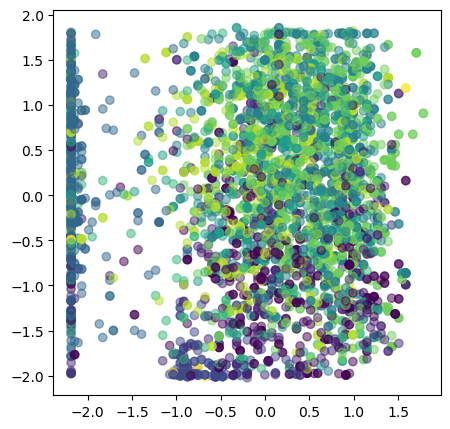

In [83]:
# Interesting that one cluster is so tiny compared to the others - I wonder why. I'd expect the theoretical pop cluster to be the biggest
# Time to plot - although the outcome is a giant waste of time - really difficult to see the shades and huge amounts of overlap  
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 10], c=clusters,alpha=0.5)
plt.show()

In [84]:
kmeans.inertia_ 

32270.99068019681

In [85]:
# doing the fitting increases the inertia score 

kmeans = KMeans(n_clusters=8,
                init="random",
                n_init= 1,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

36584.4143195163


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

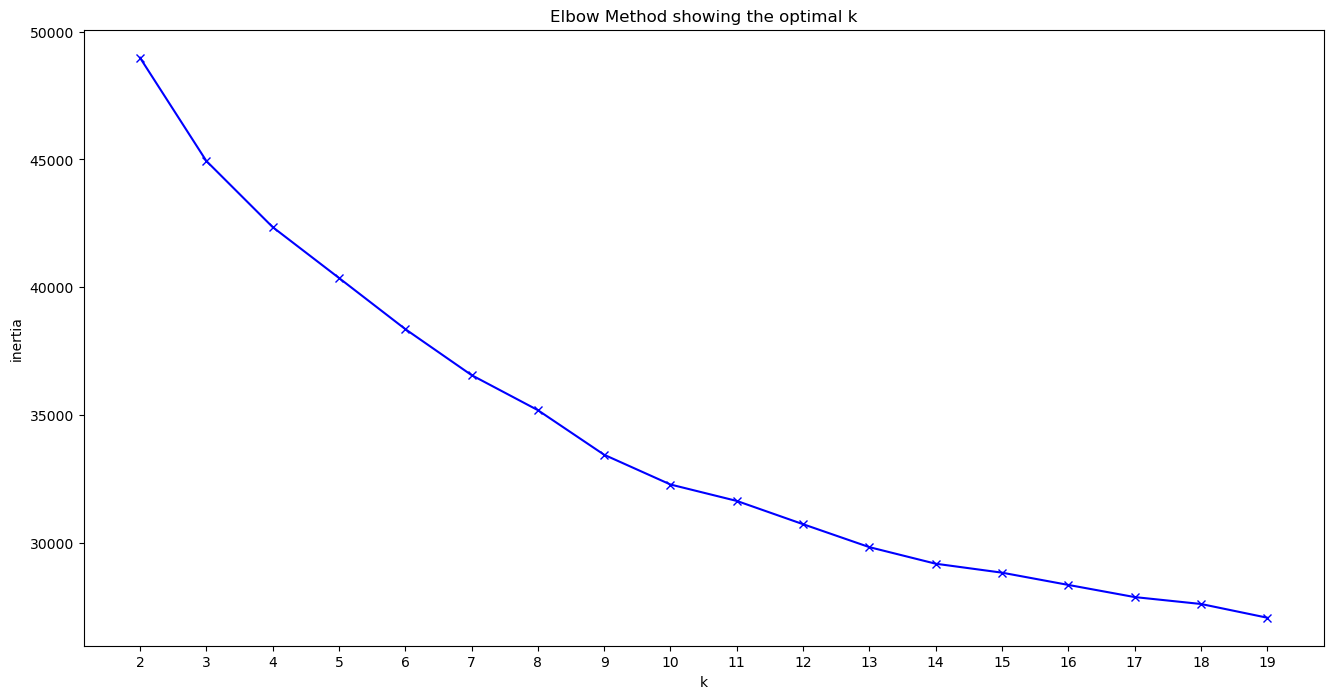

In [87]:
# Now to plot and try and identify the elbow point for the clusters

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [88]:
# Not a very clear elbow point. Does start to level off but perhaps only around 12 or 14 or arguably 3
# Quite gradual decline - I think probably 9 is a good one, there the gradient starts to fall a bit

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

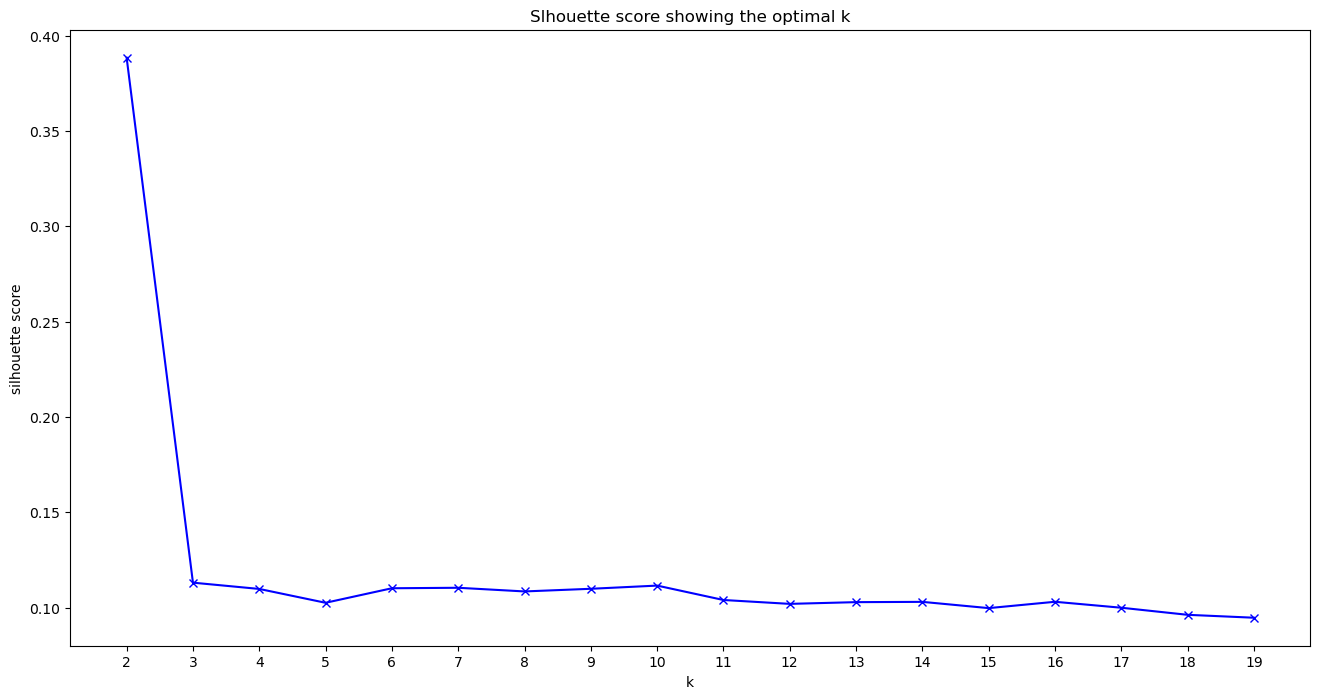

In [104]:
# Let's try another method. Doesn't look great or very helpful but based on this you could argue 10 is the correct number
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [206]:
# Going to stick with 10 clusters - will then add this back on to the DB as a new column

musicdb['cluster'] = clusters
musicdb

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,CARNIVAL,¥$,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0,5
1,CARNIVAL,Kanye West,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0,5
2,CARNIVAL,Ty Dolla $ign,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0,5
3,CARNIVAL,Rich The Kid,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0,5
4,CARNIVAL,Playboi Carti,3w0w2T288dec0mgeZZqoNN,94,0.594,0.811,1.0,-5.746,1.0,0.1590,0.18900,0.00000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,Work It (feat. 50 Cent) - Remix,50 Cent,7Ml5yFM5H8gCQ4U4NSe4Bc,45,0.842,0.748,1.0,-5.361,1.0,0.2790,0.06100,0.00000,0.0877,0.622,101.753,audio_features,7Ml5yFM5H8gCQ4U4NSe4Bc,spotify:track:7Ml5yFM5H8gCQ4U4NSe4Bc,https://api.spotify.com/v1/tracks/7Ml5yFM5H8gC...,https://api.spotify.com/v1/audio-analysis/7Ml5...,304560.0,4.0,7
4179,Cheers (Drink To That),Rihanna,5Lm8wha7kmEuqyjJ237HNM,52,0.572,0.913,9.0,-3.626,1.0,0.0425,0.01800,0.00000,0.2930,0.724,79.986,audio_features,5Lm8wha7kmEuqyjJ237HNM,spotify:track:5Lm8wha7kmEuqyjJ237HNM,https://api.spotify.com/v1/tracks/5Lm8wha7kmEu...,https://api.spotify.com/v1/audio-analysis/5Lm8...,261747.0,4.0,7
4180,Toca's Miracle,Coco Star,7hMlGTuvLYTilQ3MFHmxDy,22,0.727,0.697,2.0,-8.188,1.0,0.0341,0.00441,0.00805,0.1450,0.307,129.996,audio_features,7hMlGTuvLYTilQ3MFHmxDy,spotify:track:7hMlGTuvLYTilQ3MFHmxDy,https://api.spotify.com/v1/tracks/7hMlGTuvLYTi...,https://api.spotify.com/v1/audio-analysis/7hMl...,208615.0,3.0,3
4181,Cinema (feat. Gary Go) - Radio Edit,Benny Benassi,4IazOWzgfLB8MR5VIY368A,58,0.481,0.825,2.0,-2.549,1.0,0.0581,0.06450,0.00000,0.2630,0.369,129.896,audio_features,4IazOWzgfLB8MR5VIY368A,spotify:track:4IazOWzgfLB8MR5VIY368A,https://api.spotify.com/v1/tracks/4IazOWzgfLB8...,https://api.spotify.com/v1/audio-analysis/4Iaz...,182973.0,4.0,0


In [207]:
clean_db = musicdb[['song_name',	'name',	'song_id', 'cluster']]
clean_db.rename(columns={'name': 'artist'}, inplace=True)
clean_db

/var/folders/55/2k8v69bx3rb3kj6zvhtb3bcc0000gn/T/ipykernel_70768/2442655161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_db.rename(columns={'name': 'artist'}, inplace=True)


,song_name,artist,song_id,cluster
0,CARNIVAL,¥$,3w0w2T288dec0mgeZZqoNN,5
1,CARNIVAL,Kanye West,3w0w2T288dec0mgeZZqoNN,5
2,CARNIVAL,Ty Dolla $ign,3w0w2T288dec0mgeZZqoNN,5
3,CARNIVAL,Rich The Kid,3w0w2T288dec0mgeZZqoNN,5
4,CARNIVAL,Playboi Carti,3w0w2T288dec0mgeZZqoNN,5
...,...,...,...,...
4178,Work It (feat. 50 Cent) - Remix,50 Cent,7Ml5yFM5H8gCQ4U4NSe4Bc,7
4179,Cheers (Drink To That),Rihanna,5Lm8wha7kmEuqyjJ237HNM,7
4180,Toca's Miracle,Coco Star,7hMlGTuvLYTilQ3MFHmxDy,3
4181,Cinema (feat. Gary Go) - Radio Edit,Benny Benassi,4IazOWzgfLB8MR5VIY368A,0


# Lab - Create the recommender 

Now we need to create the recommender MVP. The user inputs a song: 
- if the song is in the hot 100 list, then you need to respond with another song in the hot 100
- if not, then you need to find the audio features of the song using the spotify api.
- then, apply the cluster model to the song
- then recommend a song from the same cluster 

In [106]:
# Lifting my top 100 code from a previous lab, to generate the hot 100 table as a first step for searching
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://www.popvortex.com/music/charts/top-100-songs.php"
response = requests.get(url)
tunes = BeautifulSoup(response.content, "html.parser")

title = []
for cite in tunes.select("div.chart-content.col-xs-12.col-sm-8 > p > cite"):
    #print(li.get_text().split("-"))
    title.append(cite.get_text().split("-")[0])    # .strip()
    # artist.append(cite.get_text().split("-")[1])

artist = []
for cite in tunes.select("div.chart-content.col-xs-12.col-sm-8 > p > em"):
    #print(li.get_text().split("-"))
    artist.append(cite.get_text().split("-")[0])    # .strip()
    # artist.append(cite.get_text().split("-")[1])

top100 = pd.DataFrame({"artist":artist,
                           "title":title
                          })
top100

,artist,title
0,Post Malone,I Had Some Help (feat. Morgan Wallen)
1,Shaboozey,A Bar Song (Tipsy)
2,RM,Come back to me
3,Kendrick Lamar,Not Like Us
4,Teddy Swims,Lose Control
...,...,...
95,Maisy Kay,Technicolor Honeymoon
96,GloRilla & Megan Thee Stallion,Wanna Be
97,4batz,act iii: on god? (she like)
98,4batz,get out yo feelings ho


In [115]:
# Basic code for searching and returning outputs from the table - I can use this for part 1 
search_term = input("Enter the song title: ") # Will keep it at title only for now and maybe add artist later

# Filter the DataFrame based on the input
result = top100[top100['title'] == search_term]

# Display the result
if not result.empty: 
    print("Result found:")
    print(result.head(1)) # I added this because there seems to be some duplication in the list, so we only want one result
else:
    print("No matching result found.")

Enter the song title:  yes


No matching result found.


In [129]:
# It works, so now I need to get it to give a response of a different song

search_term = input("Enter the song title: ") # Will keep it at title only for now and maybe add artist later

# Filter the DataFrame based on the input
result = top100[top100['title'] == search_term]

# Display the result
if not result.empty:
    print("We're glad you like:")
    # Print the artist name and title separately
    print(result['title'].iloc[0], "by", result['artist'].iloc[0])    # Access song title
    print("Here's another similar song you might like: ")
    random_row = top100.sample(n=1)
    print(random_row['title'].iloc[0],"by", random_row['artist'].iloc[0] )
else:
    print("No matching result found.")

Enter the song title:  Wanna Be


We're glad you like:
Wanna Be by GloRilla & Megan Thee Stallion
Here's another similar song you might like: 
Unwritten by Natasha Bedingfield


In [137]:
# Now we are cooking with gas. Time to add the api search if the result is not in the hot 100 table

search_term = 'Wanna Be'

In [164]:
# Here I am returning the song ID of the search result via the spotify API, ready to fetch the audio features
no_results = sp.search(q=search_term, limit=1)
pd.set_option("display.max_columns", 0)
tracks = json_normalize(no_results["tracks"]["items"])

artist_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify', 'song_id','popularity'])
for i in tracks.index:
    artists_for_song = json_normalize(tracks.iloc[i]['artists'])
    artists_for_song['song_id'] = tracks.iloc[i]['id']            # we keep song id, it is the same for all the artists on the song
    artists_for_song['song_name'] = tracks.iloc[i]['name']        # same for song_name
    artists_for_song['popularity'] = tracks.iloc[i]['popularity'] # and for popularity   
    artist_df = pd.concat([artist_df, artists_for_song], axis=0)

artist_df = artist_df[['song_id','popularity']].loc[0]
artist_df

song_id       0Izt8MdEU7zDy2hDsm5YkH
popularity                        75
Name: 0, dtype: object

In [201]:
# Callint the api to get the track and putting that into a cute one row dataframe, with the columns to match my scaler
fil_artist_df = artist_df['song_id']
features = sp.audio_features(fil_artist_df)
n_features = json_normalize(features)
true = n_features.drop(['type','id','uri','track_href', 'analysis_url'],axis=1)
pop =  artist_df['popularity']
true.insert(0, 'popularity', pop)
# true['popularity'] = artist_df['popularity']
scaled_features = scaler.transform(true)
scaled_features
predicted_cluster = kmeans.predict(scaled_features)
predicted_cluster

array([14], dtype=int32)

In [214]:
# filtered_db = musicdb[musicdb['cluster'] == predicted_cluster]
filtered_db = musicdb[musicdb['cluster'].isin(predicted_cluster)]
random_index = np.random.choice(filtered_db.index)
random_row2 = filtered_db.loc[random_index]
print("Here's another similar song you might like: ")
print(random_row2['song_name'],"by", random_row2['name'])

Here's another similar song you might like: 
CUFF IT by Beyoncé


In [215]:
# Excellent, time to put it all together into one giant cell. LET's GO 

search_term = input("Please enter a song title: ") # Will keep it at title only for now and maybe add artist later

# Filter the DataFrame based on the input
result = top100[top100['title'] == search_term]

# Display the result
if not result.empty:
    print("We're glad you like:")
    # Print the artist name and title separately
    print(result['title'].iloc[0], "by", result['artist'].iloc[0])    # Access song title
    print("Here's another similar song you might like: ")
    random_row = top100.sample(n=1)
    print(random_row['title'].iloc[0],"by", random_row['artist'].iloc[0] )

else:
    no_results = sp.search(q=search_term, limit=1)
    pd.set_option("display.max_columns", 0)
    tracks = json_normalize(no_results["tracks"]["items"])
    
    artist_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify', 'song_id','popularity'])
    for i in tracks.index:
        artists_for_song = json_normalize(tracks.iloc[i]['artists'])
        artists_for_song['song_id'] = tracks.iloc[i]['id']            
        artists_for_song['song_name'] = tracks.iloc[i]['name']       
        artists_for_song['popularity'] = tracks.iloc[i]['popularity']   
        artist_df = pd.concat([artist_df, artists_for_song], axis=0)
    
    artist_df = artist_df[['song_id','popularity']].loc[0]
    
    fil_artist_df = artist_df['song_id']
    features = sp.audio_features(fil_artist_df)
    n_features = json_normalize(features)
    true = n_features.drop(['type','id','uri','track_href', 'analysis_url'],axis=1)
    pop =  artist_df['popularity']
    true.insert(0, 'popularity', pop)
    
    scaled_features = scaler.transform(true)
    predicted_cluster = kmeans.predict(scaled_features)
    filtered_db = musicdb[musicdb['cluster'].isin(predicted_cluster)]
    random_index = np.random.choice(filtered_db.index)
    random_row2 = filtered_db.loc[random_index]
    print("We're glad you like:",search_term)
    print("Here's another similar song you might like: ")
    print(random_row2['song_name'],"by", random_row2['name'])


Please enter a song title:  test


We're glad you like: test
Here's another similar song you might like: 
I Need a Boiler Room by blk.


In [228]:
# Now to turn it into a function 
def giz_a_song(top100=top100, sp=sp, scaler=scaler, kmeans=kmeans, musicdb=musicdb):
    import pandas as pd
    import numpy as np
    
    # Prompt user for input
    search_term = input("Please enter a song title: ")

    # Filter the DataFrame based on the input
    result = top100[top100['title'] == search_term]

    # Display the result
    if not result.empty:
        print("We're glad you like:")
        # Print the artist name and title separately
        print(result['title'].iloc[0], "by", result['artist'].iloc[0])    # Access song title
        print("Here's another similar song you might like: ")
        random_row = top100.sample(n=1)
        print(random_row['title'].iloc[0],"by", random_row['artist'].iloc[0] )

    else:
        no_results = sp.search(q=search_term, limit=1)
        pd.set_option("display.max_columns", 0)
        tracks = json_normalize(no_results["tracks"]["items"])

        artist_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify', 'song_id','popularity'])
        for i in tracks.index:
            artists_for_song = json_normalize(tracks.iloc[i]['artists'])
            artists_for_song['song_id'] = tracks.iloc[i]['id']            
            artists_for_song['song_name'] = tracks.iloc[i]['name']       
            artists_for_song['popularity'] = tracks.iloc[i]['popularity']   
            artist_df = pd.concat([artist_df, artists_for_song], axis=0)

        artist_df = artist_df[['song_id','popularity']].loc[0]

        fil_artist_df = artist_df['song_id']
        features = sp.audio_features(fil_artist_df)
        n_features = json_normalize(features)
        true = n_features.drop(['type','id','uri','track_href', 'analysis_url'],axis=1)
        pop =  artist_df['popularity']
        true.insert(0, 'popularity', pop)

        scaled_features = scaler.transform(true)
        predicted_cluster = kmeans.predict(scaled_features)
        filtered_db = musicdb[musicdb['cluster'].isin(predicted_cluster)]
        random_index = np.random.choice(filtered_db.index)
        random_row2 = filtered_db.loc[random_index]
        print("We're glad you like:",search_term)
        print("Here's another similar song you might like: ")
        print(random_row2['song_name'],"by", random_row2['name'])

# Example usage:
# find_similar_song()

In [229]:
giz_a_song() 

Please enter a song title:  Three Lions


We're glad you like: Three Lions
Here's another similar song you might like: 
Promesses - Radio Edit by Kaleem Taylor


In [231]:
# IT LIVES !!!!! 
# To improve I would probably increase the size of my original DB, then I can give better suggestions
# I could also add spotify links to the songs so that you can open them straight away rather than just get the title
# I could also probably have it search for the song on spotify first and then also give a spotify link for those in the vortex list
# I can also try and add the artist as well as an input to get better responses